In [3]:
## Time Series Prediction 
# 1,3,5,7,9,12,14
# 2,4,6,8,10,11,13

## load data
data = pd.read_csv("unmatch_shops.csv")
agg=data.groupby(['performance_date']).agg({'masked_order': 'sum'}).reset_index()
## split the dataset into two cycles 
df1=data.loc[data['performance_date'].isin([1,3,5,7,9,12,14])]
df2=data.loc[data['performance_date'].isin([2,4,6,8,10,11,13])]

In [6]:
df1 = df1.replace({'performance_date': 1}, 1)
df1 = df1.replace({'performance_date': 3}, 2)
df1 = df1.replace({'performance_date': 5}, 3)
df1 = df1.replace({'performance_date': 7}, 4)
df1 = df1.replace({'performance_date': 9}, 5)
df1 = df1.replace({'performance_date': 12}, 6)
df1 = df1.replace({'performance_date': 14}, 7)

In [8]:
df2 = df1.replace({'performance_date': 2}, 1)
df2 = df1.replace({'performance_date': 4}, 2)
df2 = df1.replace({'performance_date': 6}, 3)
df2 = df1.replace({'performance_date': 8}, 4)
df2 = df1.replace({'performance_date': 10}, 5)
df2 = df1.replace({'performance_date': 11}, 6)
df2 = df1.replace({'performance_date': 13}, 7)

In [10]:
df1.to_csv('train.csv')
df2.to_csv('test.csv')
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")


In [117]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# load the dataset
data = pd.read_csv("unmatch_shops.csv")
data = data.drop('Unnamed: 0', 1)
data = data.drop('shop_index', 1)
data = data.drop('decorated_indicator', 1)
data = data.drop('masked_campaign_tab_click', 1)



In [2]:
## Threhold prediction 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
X = data.drop("masked_order",1)
y = data["masked_order"]


In [3]:
#get unmatched shop features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top Our 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                            Specs          Score
12         masked_item_impression  192094.743032
15         masked_other_tab_click   17161.243434
9                shop_L180D_order    7017.785715
8            shop_follower_number    4716.130794
14  masked_shop_click_from_search     141.479360


In [4]:
#get features of whitelist shops
w_df = pd.read_csv('whitelist_filled_latest.csv')

w_df = w_df.drop('Unnamed: 0', 1)
w_df = w_df.drop('shop_index', 1)
w_df = w_df.drop('decorated_indicator', 1)
w_df = w_df.drop('masked_campaign_tab_click',1)
w_x = w_df.drop("masked_order",1)
w_y = w_df["masked_order"]

#apply SelectKBest class to extract top 6 best features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(w_x,w_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(w_x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 6 best features

                            Specs        Score
14  masked_shop_click_from_search  2683.201382
15         masked_other_tab_click  1834.249525
12         masked_item_impression   589.313547
8            shop_follower_number   500.935029
9                shop_L180D_order   413.186404


In [5]:
#calculate the coefficient 
feature = featureScores.nlargest(5,'Score')
feature['Score'] = feature['Score']/(feature['Score'].sum())
feature

,Specs,Score
14,masked_shop_click_from_search,0.445649
15,masked_other_tab_click,0.304648
12,masked_item_impression,0.097878
8,shop_follower_number,0.083200
9,shop_L180D_order,0.068626


In [6]:
#calculate the score of whitelist shops
features = list(feature['Specs'])
scores = list(feature['Score'])
equation = ''
for i in range(len(features)):
    equation  += str(scores[i]) +'*'+str(features[i])+'+'
equation = 'Score='+ equation[:len(equation)-1]
equation
wf_process = w_df[features]
wf_process = wf_process.eval(equation)
pd.set_option('display.float_format',lambda x : '%.2f' % x)
wf_process.to_csv('whitelist_with_score.csv')


In [7]:
wf_process['Score'].describe()

count             7504.00
mean        9291614023.74
std       172574113786.31
min                119.28
25%             515177.86
50%           13457752.54
75%          170504258.71
max     10606572483257.33
Name: Score, dtype: float64

In [8]:
#get score for all unmatched shops
data_process = data[features]
data_process = data_process.eval(equation)
data_process
data_process.to_csv('unmatch_with_score.csv')

In [9]:
data_process['Score'].describe()

count         111720.00
mean        41370823.33
std       2030310290.62
min              114.22
25%              524.16
50%            20026.26
75%           214157.10
max     496252535290.79
Name: Score, dtype: float64

0 ('manage_shop_indicator', 298.2345174198238)
1 ('officialstore_indicator', 0.006880009865914157)
2 ('preferred_shop_indicator', 76.94802153083876)
3 ('crossborder_indicator', 0.4407203544966207)
4 ('shop_category', 5.987426035864028)
5 ('new_seller_flag', 0.8393271114930927)
6 ('seller_centre_login_L30D', 25.57286337184149)
7 ('shop_sku_number', 0.391086519230846)
8 ('shop_follower_number', 1273.7790870442461)
9 ('shop_L180D_order', 4387.591442854426)
10 ('weighted_shop_rating', 0.7832801484485566)
11 ('performance_date', 0.03427368683000848)
12 ('masked_item_impression', 57930.04581316443)
13 ('masked_shop_page_view', 0.371287901172316)
14 ('masked_shop_click_from_search', 28.301545519749492)
15 ('masked_other_tab_click', 6486.6504892756575)


/Users/Yiling/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


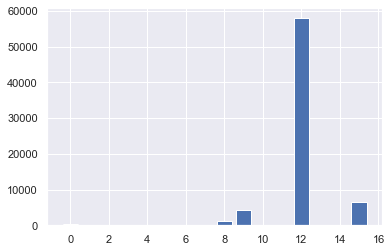

In [114]:
## prediction model

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print(i,(X.columns[i], fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 5 best features

                     Specs          Score
12  masked_item_impression  192094.743032
15  masked_other_tab_click   17161.243434
9         shop_L180D_order    7017.785715
8     shop_follower_number    4716.130794


/Users/Yiling/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
### linear regression model for unmatched shop 
## deifine data set 
X1 = data[['shop_follower_number', 'shop_L180D_order','masked_item_impression','masked_other_tab_click']]
Y1 = Y

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X1_train,Y1_train)
r_sq = regressor.score(X1_train, Y1_train)
print("--------train")
print('coefficient of determination:', r_sq)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

--------train
coefficient of determination: 0.43378699334176307
intercept: [1687681.33263544]
slope: [[-8.89423925e+02  1.70268085e+02  2.21897558e-03 -1.36357381e+03]]


In [67]:
pred= regressor.predict(X1_test)
test_set_rmse = (np.sqrt(mean_squared_error(Y1_test, pred)))
test_set_r2 = r2_score(Y1_test, pred)
print("--------test")
print(test_set_rmse)
print(test_set_r2)

--------test
301311314.8544526
0.2986543788617816


In [80]:
## Polynomial 

from sklearn.model_selection import train_test_split 
X=data.loc[:, data.columns == 'shop_L180D_order']
y=data.loc[:,data.columns =='masked_order']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


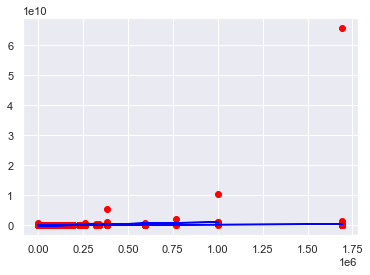

In [98]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    return
viz_polymonial()

In [105]:
print("--------test")
pred=pol_reg.predict(poly_reg.fit_transform(X_test))
test_set_r2 = r2_score(y_test, pred)
test_set_r2

--------test


0.01271290860147134